Team ID:PNT2022TMID25718

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)

(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

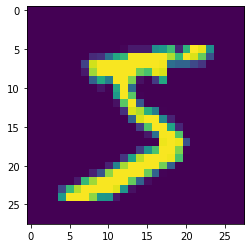

In [6]:
plt.imshow(X_train[0])

Data Preprocessing

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create Model

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])


In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5

1875/1875 [==============================] - 196s 104ms/step - loss: 0.2287 - accuracy: 0.9545 - val_loss: 0.0985 - val_accuracy: 0.9733

Epoch 2/5

1875/1875 [==============================] - 195s 104ms/step - loss: 0.0621 - accuracy: 0.9812 - val_loss: 0.0776 - val_accuracy: 0.9790

Epoch 3/5

1875/1875 [==============================] - 194s 103ms/step - loss: 0.0461 - accuracy: 0.9851 - val_loss: 0.0847 - val_accuracy: 0.9763

Epoch 4/5

1875/1875 [==============================] - 193s 103ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.0955 - val_accuracy: 0.9778

Epoch 5/5

1875/1875 [==============================] - 194s 103ms/step - loss: 0.0283 - accuracy: 0.9914 - val_loss: 0.1242 - val_accuracy: 0.9743


Test the Model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 

[0.12420044839382172, 0.9743000268936157]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 95ms/step

[[4.2476056e-08 5.0693601e-15 1.5794379e-08 1.4532749e-07 3.5170849e-16

  1.2075290e-14 1.5686039e-18 9.9999988e-01 2.7307693e-11 6.1261085e-10]

 [8.9022328e-10 6.4137801e-12 9.9999928e-01 9.6712305e-10 7.5354116e-17

  2.2103276e-13 5.5830577e-07 2.1301915e-18 1.6853596e-07 3.5003905e-17]

 [7.2572580e-11 9.9995959e-01 1.2934409e-07 3.3307094e-12 2.0014747e-06

  6.9414054e-06 1.5949030e-09 7.7253696e-11 3.1403306e-05 3.6155386e-13]

 [1.0000000e+00 1.4265362e-19 3.3638474e-11 1.2359819e-20 2.4845849e-17

  5.4995043e-16 2.2762909e-16 5.6324746e-17 1.1860469e-11 1.6514998e-12]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
model.save("models/mnistCNN.h5")